# Final Project FP-4:  Descriptive Statistics


<br>
<br>


___

<br>

# Analysis of factors related to maternal, child, and adolescent health needs in San Francisco, CA


* **Name**:  Usa Mori
* **Student number**:  a0252207

<br>

### Purpose:

- The purpose of this project is to analyze factors related to San Franciscans' well-being in the categories of medical conditions, nutrition, dehydration, oral health, mental health, safety, and access to health care, and basic needs (e.g. housing).
- The key **dependent variable** is the number of people or cases in the population group (categorized by age group and year of data recording) with the condition.
- The key **independent variables** are race-ethnicity, age group, the number of people in the overall group (the denominator), year, zip code, the primary neighborhoods associated with each zip code, and details noted about each cause of death group.
- The dataset contains 62.7k entries and has 28 columns. Each entry constitutes group-level health results for any age-, sex-, race-, insurance-, zip code-, and/or period-specific group with a minimum of 20 people. 
<br>

### Dataset source:

The data comes from the [Maternal, Child, and Adolescent Health Needs Assessment, 2023-2024](https://data.sfgov.org/Health-and-Social-Services/Maternal-Child-and-Adolescent-Health-Needs-Assessm/iqtk-etij/about_data) and is provided by the San Francisco Department of Public Health. It and its data definitions are available for download through the above link. It was created from citywide population data from 2014-2023, including information from birth records, death records, emergency room vsits, hospital admissions, newborn screening discharges, child welfare records, health screenings in childcare and schools, DMV records of first-time drivers, school surveys, and the California Department of Public Health MIHA survey. It focuses on rates of occurrence for health conditions/wellness concerns by age, sex, race, ethnicity, insurance status, zip code, and time period. The dataset was last updated on August 8, 2025, and continues to be updated bi-anually.


#### References:

Maternal, Child, and Adolescent Health Needs Assessment, 2023-2024 | DataSF. https://data.sfgov.org/Health-and-Social-Services/Maternal-Child-and-Adolescent-Health-Needs-Assessm/iqtk-etij/about_data.

___

## Descriptive Statistics



In [2]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd

import descriptive as desc
df = desc.parse_csv('healthassessment.csv')

In [4]:
desc.display_central_tendency_table(num=1)
desc.display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,denominator,number_with_outcome
mean,42740.203,462.246
median,7184.000,74.000
mode,1158.000,21.000


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,denominator,number_with_outcome
st.dev.,130898.941,2625.755
min,23.000,14.000
max,2804452.000,176888.000
range,2804429.000,176874.000
25th,1116.000,36.000
75th,26367.000,221.000
IQR,25251.000,185.000


In [5]:
df[['denominator', 'number_with_outcome', 'topic']].groupby(
    ['topic']).count()

,denominator,number_with_outcome
topic,,
ACCESS TO CARE,2216,2216
DEATH,96,96
DENTAL,1595,1595
HEALTH BEHAVIOR,2511,2511
HEALTH CONDITION,25788,25788
MENTAL HEALTH,5439,5439
NUTRITION,8358,8358
SAFETY,8629,8629
SOCIAL DETERMINANT,1281,1281


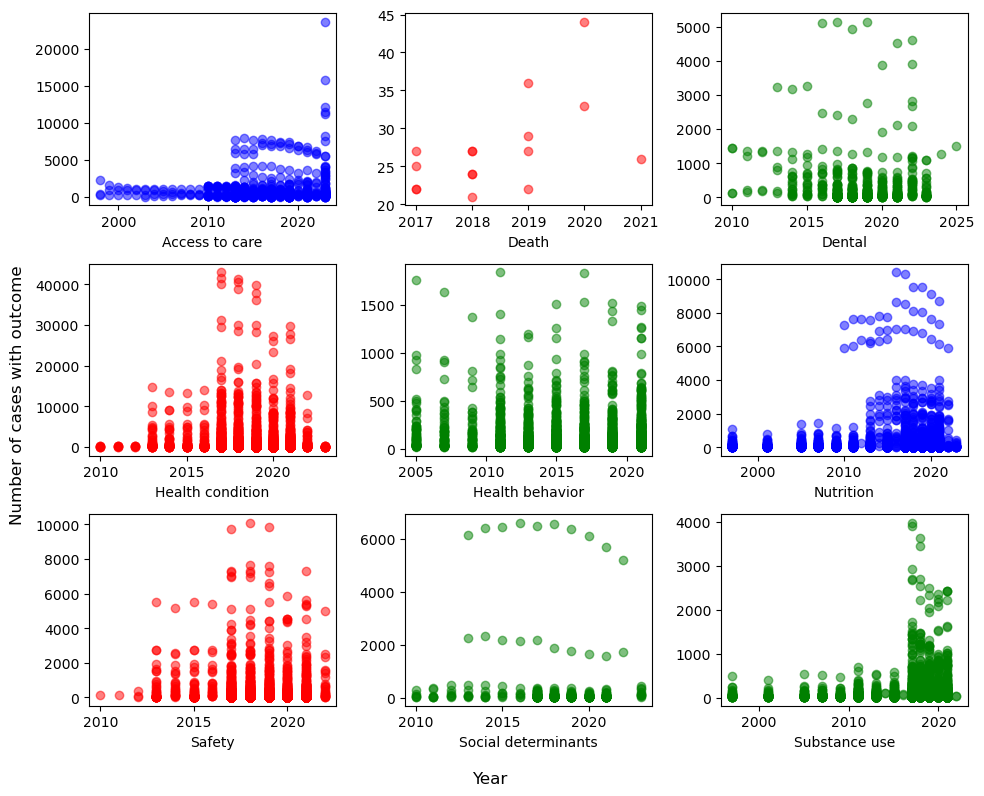

In [6]:
df_access = df[['number_with_outcome']].where( df.topic == 'ACCESS TO CARE' )
df_death = df[['number_with_outcome']].where( df.topic == 'DEATH' )
df_dental = df[['number_with_outcome']].where( df.topic == 'DENTAL' )
df_healthcond = df[['number_with_outcome']].where( df.topic == 'HEALTH CONDITION' )
df_healthbehav = df[['number_with_outcome']].where( df.topic == 'HEALTH BEHAVIOR' )
df_nutrition = df[['number_with_outcome']].where( df.topic == 'NUTRITION' )
df_safety = df[['number_with_outcome']].where( df.topic == 'SAFETY' )
df_socialdeterm = df[['number_with_outcome']].where( df.topic == 'SOCIAL DETERMINANT' )
df_substance = df[['number_with_outcome']].where( df.topic == 'SUBSTANCE USE' )

fig,axs = plt.subplots( 3, 3, figsize=(10,8), tight_layout=False )

axs[0,0].scatter( df[['year']], df_access, alpha=0.5, color='b' )
axs[0,0].set_xlabel('Access to care')

axs[0,1].scatter( df[['year']], df_death, alpha=0.5, color='r' )
axs[0,1].set_xlabel('Death')

axs[0,2].scatter( df[['year']], df_dental, alpha=0.5, color='g' )
axs[0,2].set_xlabel('Dental')

axs[1,0].scatter( df[['year']], df_healthcond, alpha=0.5, color='r' )
axs[1,0].set_xlabel('Health condition')

axs[1,1].scatter( df[['year']], df_healthbehav, alpha=0.5, color='g' )
axs[1,1].set_xlabel('Health behavior')

axs[1,2].scatter( df[['year']], df_nutrition, alpha=0.5, color='b' )
axs[1,2].set_xlabel('Nutrition')

axs[2,0].scatter( df[['year']], df_safety, alpha=0.5, color='r' )
axs[2,0].set_xlabel('Safety')

axs[2,1].scatter( df[['year']], df_socialdeterm, alpha=0.5, color='g' )
axs[2,1].set_xlabel('Social determinants')

axs[2,2].scatter( df[['year']], df_substance, alpha=0.5, color='g' )
axs[2,2].set_xlabel('Substance use')

fig.supxlabel('Year')
fig.supylabel('Number of cases with outcome')

plt.show()